# Deliverable 3 

## 7 Machine Learning

In [2]:
## Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy import stats

plt.style.use('ggplot')
warnings.filterwarnings("ignore")


In [3]:
# Using the data which we processed in pre_processing stage
df = pd.read_csv('jan_june.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge'],
      dtype='object')

In [5]:
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


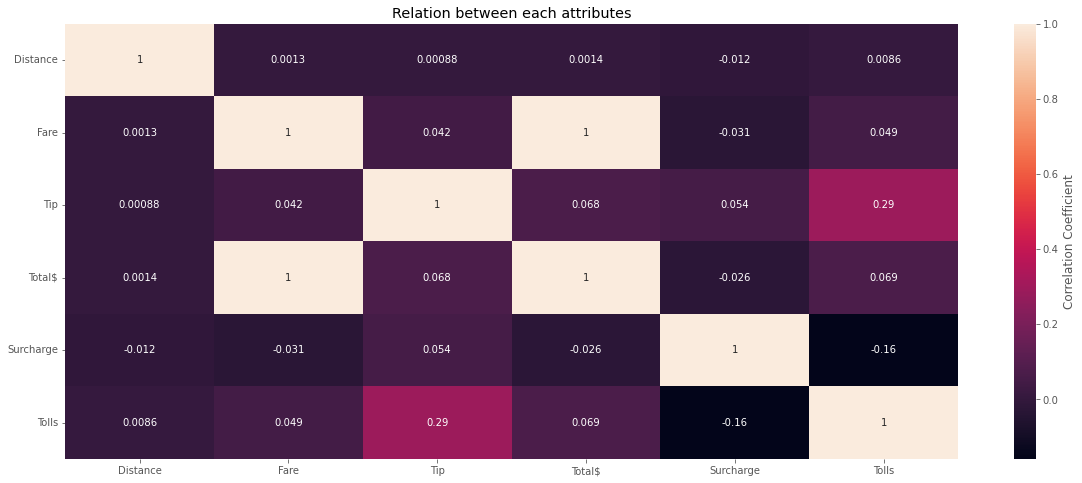

In [13]:
# Checking how each data is related to each other

column = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'congestion_surcharge', 'tolls_amount']
label = ['Distance', 'Fare', 'Tip', 'Total$', 'Surcharge', 'Tolls']

# plot correlation plot
fig, axes = plt.subplots(figsize=(20, 8))
corr_matrix = df[column].corr()
sns.heatmap(corr_matrix, annot=True, ax=axes, cbar_kws={'label': 'Correlation Coefficient'})
axes.set_xticklabels(label)
axes.set_yticklabels(label)
axes.set_title("Relation between each attributes")
plt.show()

In [15]:
sample = df[df['payment_type'] == 1].sample(frac=0.05, replace=True, random_state=30034).reset_index(drop=True)

## Using linear regression

In [16]:
COL = ['passenger_count', 'fare_amount', 'tip_amount', 'tolls_amount']
sample_filtered = sample.loc[:, COL].reset_index(drop=True)

In [17]:
# Split data to train and test
y = sample_filtered['tip_amount']
X_train, X_test, y_train, y_test = train_test_split(sample_filtered, y, test_size=0.3, random_state=0)

In [18]:
# Scale the continuous attributes
xCOLS = ['fare_amount', 'tolls_amount']

scaler = StandardScaler()
X_train[xCOLS] = scaler.fit_transform(X_train[xCOLS])
X_test[xCOLS] = scaler.transform(X_test[xCOLS])

In [19]:
# Baseline model which contains only the intercept

baseline = ols(formula='tip_amount ~ 1', data=X_train).fit()
print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 May 2022   Prob (F-statistic):                nan
Time:                        20:00:19   Log-Likelihood:            -6.2811e+05
No. Observations:              263995   AIC:                         1.256e+06
Df Residuals:                  263994   BIC:                         1.256e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9085      0.005    571.998      0.0

In [20]:
base_train_pred = baseline.predict(X_train)
base_test_pred = baseline.predict(X_test)
train_rmse = mean_squared_error(y_train, base_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, base_test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 2.612549679104918
Test RMSE: 2.443028779180811


In [23]:
# fit the model
full_model = ols(formula='tip_amount ~ C(passenger_count) + fare_amount + tolls_amount', data=X_train).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                 1.968e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        20:02:11   Log-Likelihood:            -5.5458e+05
No. Observations:              263995   AIC:                         1.109e+06
Df Residuals:                  263984   BIC:                         1.109e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [24]:
# predict and evaluate
full_train_pred = full_model.predict(X_train)
full_test_pred = full_model.predict(X_test)
train_rmse = mean_squared_error(y_train, full_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, full_test_pred, squared=False)
train_r2 = r2_score(y_train, full_train_pred)
test_r2 = r2_score(y_test, full_test_pred)

print("Full model")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2", train_r2)
print("Test R2", test_r2)

Full model
Train RMSE: 1.9773669943294323
Test RMSE: 1.76086385541668
Train R2 0.42714402608427693
Test R2 0.48047536490264375


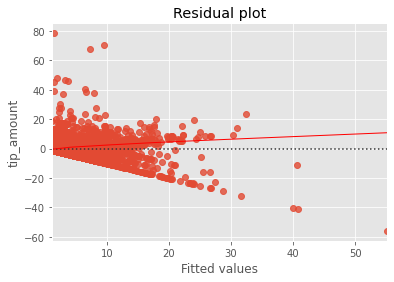

In [25]:
sns.residplot(full_test_pred,y_test,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

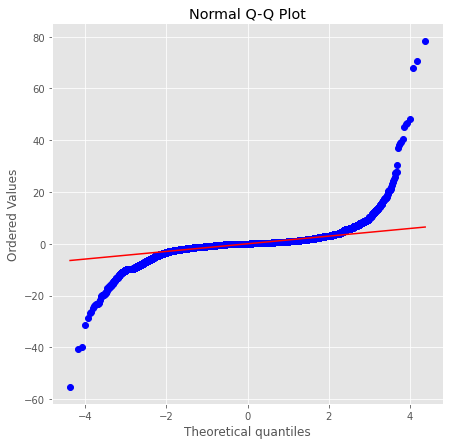

In [26]:
residuals = y_test - full_test_pred

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

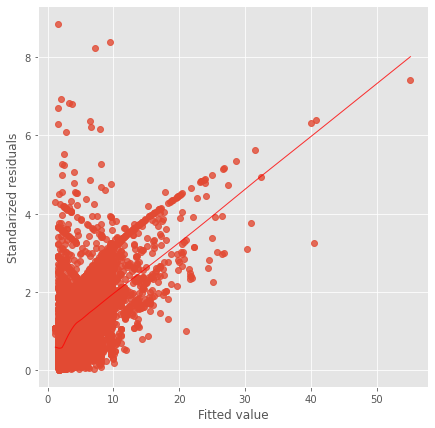

In [27]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(full_test_pred, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

##  Using Gradient Boost Regression

In [28]:
# Sampling the data

sample_filtered = pd.get_dummies(sample_filtered, drop_first=True)

In [29]:
# train test split the sampled data

y = sample_filtered['tip_amount']
sample_filtered = sample_filtered.drop(['tip_amount'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(sample_filtered, y, test_size=0.3, random_state=0)

In [30]:
# fit the model
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [31]:
gbr_train_pred = reg.predict(X_train)
gbr_test_pred = reg.predict(X_test)
train_rmse = mean_squared_error(y_train, gbr_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, gbr_test_pred, squared=False)
train_r2 = r2_score(y_train, gbr_train_pred)
test_r2 = r2_score(y_test, gbr_test_pred)

print("Gradient Boost Regression")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2", train_r2)
print("Test R2", test_r2)

Gradient Boost Regression
Train RMSE: 1.84170912235433
Test RMSE: 1.7327587287274095
Train R2 0.5030496928046191
Test R2 0.4969272672020193
